In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.feature_extraction.text import CountVectorizer as cver

In [7]:
to_impute_cat=[]
to_impute_num=[]
for col in data.columns:
    if (data.loc[:,col].isnull().sum()/data.shape[0])>0 and (data.loc[:,col].isnull().sum()/data.shape[0]) <0.2:
        if data.loc[:,col].dtype =='object':
            to_impute_cat.append(col)
        else:
            to_impute_num.append(col)
numerical_data=data.loc[:,to_impute_num]
categorical_data=data.loc[:,to_impute_cat]
pure_num_data=numerical_data.copy()
pure_cat_data=categorical_data.copy()
pure_num_data.dropna(inplace=True)
pure_cat_data.dropna(inplace=True)

In [123]:
train_list=[credit_train_new,inst_train1_imputed,pos_train1_imputed,previous_application_imputed,app_train_imputed]
df_to_agg=[]
for data in range(len(train_list)):
    if train_list[data].loc[:,'SK_ID_CURR'].nunique() != train_list[data].shape[0]:
        df_to_agg.append(data)
print(df_to_agg)

[0, 1, 2, 3]


In [483]:
bureau1 = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\bureau.csv')
bureau_balance1 = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\bureau_balance.csv')
cc =pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\credit_card_balance.csv')
pos=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\POS_CASH_balance.csv')
inst=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\installments_payments.csv')
prevapp =pd.read_csv(r"C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\previous_application.csv")
app_train = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\application_train.csv')
app_test = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\application_test.csv')

agg_credit_fin,agg_inst_fin,agg_pos_fin,agg_prevapp_fin,agg_bureau_fin,agg_app_fin=preprocessing_pipeline(app_train,app_test,prevapp,bureau1,bureau_balance1,cc,pos,inst)

Want train or test?:(0:train,1:test)--0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value i

In [486]:
df=agg_app_fin.join(agg_inst_fin,how='inner',on='SK_ID_CURR',lsuffix='1',rsuffix='2')
df1=df.join(agg_prevapp_fin,how='inner',lsuffix='1',rsuffix='2')
df2=df1.join(agg_pos_fin,how='inner',lsuffix='1',rsuffix='2')
df3=df2.join(agg_bureau_fin,how='inner',lsuffix='1',rsuffix='2')
df4=df3.join(agg_credit_fin,how='inner',lsuffix='1',rsuffix='2')
df4.shape

(72793, 396)

In [492]:
train.to_csv('FINAL_TRAIN_MERGED.csv')

In [487]:
train=df4.copy()

In [480]:
bureau1 = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\bureau.csv')
bureau_balance1 = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\bureau_balance.csv')
cc =pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\credit_card_balance.csv')
pos=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\POS_CASH_balance.csv')
inst=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\installments_payments.csv')
prevapp =pd.read_csv(r"C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\previous_application.csv")
app_train = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\application_train.csv')
app_test = pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\home-credit-default-risk\application_test.csv')

agg_credit_test,agg_inst_test,agg_pos_test,agg_prevapp_test,agg_bureau_test,agg_app_test=preprocessing_pipeline(app_train,app_test,prevapp,bureau1,bureau_balance1,cc,pos,inst)

Want train or test?:(0:train,1:test)--1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value i

In [481]:
df=agg_app_test.join(agg_inst_test,how='inner',on='SK_ID_CURR',lsuffix='1',rsuffix='2')
df1=df.join(agg_prevapp_test,how='inner',lsuffix='1',rsuffix='2')
df2=df1.join(agg_pos_test,how='inner',lsuffix='1',rsuffix='2')
df3=df2.join(agg_bureau_test,how='inner',lsuffix='1',rsuffix='2')
df4=df3.join(agg_credit_test,how='inner',lsuffix='1',rsuffix='2')
df4.shape

(14464, 387)

In [485]:
test=df4.copy()

In [493]:
test.to_csv('FINAL_TEST_MERGED.csv')

In [488]:
test.shape

(14464, 387)

In [451]:
#app will take either app_train or app_tes
def preprocessing_pipeline(app_train,app_test,previous_application,bureau,bureau_balance,credit_card_balance,pos_cash_balance,installment_payments):
    
    train_or_test=int(input('Want train or test?:(0:train,1:test)--'))

    final_bureau=bureau_stuff(bureau,bureau_balance,app_train,app_test,train_or_test)
    fin_cred,fin_inst,fin_pos,fin_prev,fin_app=imputation(credit_card_balance,pos_cash_balance,installment_payments,previous_application,app_train,app_test,train_or_test)
    agg_credit=fin_cred.copy()
    agg_inst=fin_inst.copy()
    agg_pos=fin_pos.copy()
    agg_prevapp=fin_prev.copy()
    agg_bureau=final_bureau.copy()
    agg_app=fin_app.copy()
    agg_credit=grouped_data(fin_cred)
    agg_inst=grouped_data(fin_inst)
    agg_pos=grouped_data(fin_pos)
    agg_prevapp=grouped_data(fin_prev)
    agg_bureau=grouped_data(final_bureau)
    agg_app=grouped_data(fin_app)

    #    merged_df=merge_fin(agg_app)

    return(agg_credit,agg_inst,agg_pos,agg_prevapp,agg_bureau,agg_app)

In [423]:
def bureau_stuff(bureau,bureau_balance,app_train,app_test,train_or_test):
                                  
    from sklearn import preprocessing
    
    if train_or_test==0:
            unique_ids=app_train.loc[:,'SK_ID_CURR']
    elif train_or_test==1:
            unique_ids=app_test.loc[:,'SK_ID_CURR']
    else:
            print('Invalid Entry:Enter 0 or 1')

    label_encoder = preprocessing.LabelEncoder()
    cleanup_nums = {"STATUS":{"C": 0, "X": -1, "0": 0,"1": 1,"2":2,"3":3,"4":4,"5":5}}
    bureau_balance.replace(cleanup_nums, inplace=True)
    bureau_balance_done=pd.DataFrame()
    bureau_balance_done1=bureau_balance.groupby(by='SK_ID_BUREAU')['STATUS'].max()
    bureau_balance_done2=pd.DataFrame(bureau_balance.groupby(by='SK_ID_BUREAU')['MONTHS_BALANCE'].max())
    bureau_balance_done=pd.DataFrame(bureau_balance_done1)
    bureau_balance_done['MONTHS_BALANCE']=bureau_balance_done2.loc[:,'MONTHS_BALANCE']
    bureau_joined=bureau.join(bureau_balance_done,how='left',on='SK_ID_BUREAU')
    
    b=bureau_joined.copy()
    list_id_b=b.loc[:,'SK_ID_CURR']
    b_skid=set(list_id_b).intersection(set(unique_ids))
    b=b[b.SK_ID_CURR.isin(b_skid)]
    list=["DAYS_CREDIT_ENDDATE","AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM_LIMIT","AMT_CREDIT_SUM"]
    df=b.copy() 
    for i in list:
        s = df.groupby('CREDIT_ACTIVE')[i].median()
        df[i].fillna(df['CREDIT_ACTIVE'].map(s), inplace=True)
    df["STATUS"].fillna(value=-1,inplace=True)
    df["MONTHS_BALANCE"].fillna(value=df["MONTHS_BALANCE"].notnull().median(),inplace=True)
    df1 = df.drop(["DAYS_ENDDATE_FACT","AMT_CREDIT_MAX_OVERDUE","AMT_ANNUITY"], axis=1)
    
    return df1

In [479]:
def imputation(cc,pos,inst,prevapp,app_train,app_test,train_or_test):
    
    if train_or_test==0:
            unique_ids=app_train.loc[:,'SK_ID_CURR']
            df=app_train.copy()
    elif train_or_test==1:
            unique_ids=app_test.loc[:,'SK_ID_CURR']
            df=app_test.copy()
    else:
            print('Invalid Entry:Enter 0 or 1')
   
    from sklearn.linear_model import LinearRegression
    list_id_credit_card_balance=cc.loc[:,'SK_ID_CURR']
    credit_skid=set(list_id_credit_card_balance).intersection(set(unique_ids))
    credit=cc[cc.SK_ID_CURR.isin(credit_skid)]
    m1 = credit['AMT_DRAWINGS_ATM_CURRENT'].median()
    m2 = credit['AMT_DRAWINGS_OTHER_CURRENT'].median()
    m3 = credit['AMT_DRAWINGS_POS_CURRENT'].median()
    m4 = credit['AMT_INST_MIN_REGULARITY'].median()
    m5 = credit['AMT_PAYMENT_CURRENT'].median()
    m6 = credit['CNT_DRAWINGS_ATM_CURRENT'].median()
    m7 = credit['CNT_DRAWINGS_OTHER_CURRENT'].median()
    m8 = credit['CNT_DRAWINGS_POS_CURRENT'].median()
    m9 = credit['CNT_INSTALMENT_MATURE_CUM'].median()
    credit_new=credit.copy()
    credit_new['AMT_DRAWINGS_ATM_CURRENT'].fillna(m1, inplace=True)
    credit_new['AMT_DRAWINGS_OTHER_CURRENT'].fillna(m2, inplace=True)
    credit_new['AMT_DRAWINGS_POS_CURRENT'].fillna(m3, inplace=True)
    credit_new['AMT_INST_MIN_REGULARITY'].fillna(m4, inplace=True)
    credit_new['AMT_PAYMENT_CURRENT'].fillna(m5, inplace=True)
    credit_new['CNT_DRAWINGS_ATM_CURRENT'].fillna(m6, inplace=True)
    credit_new['CNT_DRAWINGS_OTHER_CURRENT'].fillna(m7, inplace=True)
    credit_new['CNT_DRAWINGS_POS_CURRENT'].fillna(m8, inplace=True)
    credit_new['CNT_INSTALMENT_MATURE_CUM'].fillna(m9, inplace=True)
    
    list_id_inst=inst.loc[:,'SK_ID_CURR']
    unique_test_ids=app_test.loc[:,'SK_ID_CURR']
    inst_skid=set(list_id_inst).intersection(set(unique_ids))
    inst=inst[inst.SK_ID_CURR.isin(inst_skid)]
    inst_new=inst.copy()
    value1=inst_new['DAYS_ENTRY_PAYMENT'].median()
    value2=inst_new['AMT_PAYMENT'].median()
    inst_new['DAYS_ENTRY_PAYMENT'].fillna(value1,inplace=True)
    inst_new['AMT_PAYMENT'].fillna(value2,inplace=True)

    list_id_pos=pos.loc[:,'SK_ID_CURR']
    pos_skid=set(list_id_pos).intersection(set(unique_ids))
    pos=pos[pos.SK_ID_CURR.isin(pos_skid)]
    pos_new=pos.copy()
    val1=pos_new['CNT_INSTALMENT'].median()
    pos_new['CNT_INSTALMENT'].fillna(val1,inplace=True)
    val2=pos_new['CNT_INSTALMENT_FUTURE'].median()
    pos_new['CNT_INSTALMENT_FUTURE'].fillna(val2,inplace=True)

    list_id_data=prevapp.loc[:,'SK_ID_CURR']
    previous_application_skid=set(list_id_data).intersection(set(unique_ids))
    previous_application=prevapp[prevapp.SK_ID_CURR.isin(previous_application_skid)]
    prevapp_new = previous_application.copy()
    prevapp_new=prevapp_new.drop(columns=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis = 1)
    prevapp_new.AMT_ANNUITY[prevapp_new.AMT_ANNUITY.isnull()] = prevapp_new.AMT_ANNUITY.median()
    prevapp_new.AMT_GOODS_PRICE[prevapp_new.AMT_GOODS_PRICE.isnull()] = prevapp_new.AMT_GOODS_PRICE.median()
    prevapp_new.AMT_CREDIT[prevapp_new.AMT_CREDIT.isnull()] = prevapp_new.AMT_CREDIT.median()
    prevapp_new.CNT_PAYMENT[prevapp_new.CNT_PAYMENT.isnull()] = prevapp_new.CNT_PAYMENT.median()

    pd.crosstab(prevapp_new.PRODUCT_COMBINATION,columns="counts")/1413701*100
    prevapp_new.PRODUCT_COMBINATION[prevapp_new.PRODUCT_COMBINATION.isnull()] = "Cash"
    
    df_old=df.copy()
    df.CNT_FAM_MEMBERS[(df.CNT_FAM_MEMBERS.isnull()) & (df.CNT_CHILDREN==0)] = df.CNT_FAM_MEMBERS[(df.CNT_FAM_MEMBERS.notnull())&(df.CNT_CHILDREN==0)].median()
    df.AMT_ANNUITY[(df.AMT_ANNUITY.isnull())]= df.AMT_ANNUITY[(df.AMT_ANNUITY.notnull())].median()
    df.EXT_SOURCE_2[(df.EXT_SOURCE_2.isnull())]= df.EXT_SOURCE_2[(df.EXT_SOURCE_2.notnull())].median()
    df2=df.loc[:,["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3"]]
#     X=df2.loc[((df2.AMT_GOODS_PRICE.notnull())&(df2.CNT_FAM_MEMBERS.notnull())&(df2.EXT_SOURCE_2.notnull())
#           & (df2.EXT_SOURCE_3.notnull()) & (df2.AMT_ANNUITY.notnull()))]
#     model=LinearRegression().fit(X.loc[:,["AMT_ANNUITY","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3"]],X.loc[:,'AMT_GOODS_PRICE'])
#     preddf=df2.loc[((df2.AMT_ANNUITY.notnull())&(df2.CNT_FAM_MEMBERS.notnull())&(df2.EXT_SOURCE_2.notnull())
#           & (df2.EXT_SOURCE_3.notnull()) & (df2.AMT_GOODS_PRICE.isnull()))]
#     preddf=preddf.loc[:,["AMT_ANNUITY","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3"]]
#     print(preddf.shape)
#     df.AMT_GOODS_PRICE[(df2.AMT_ANNUITY.notnull())&(df2.CNT_FAM_MEMBERS.notnull())&(df2.EXT_SOURCE_2.notnull())
#           & (df2.EXT_SOURCE_3.notnull()) & (df2.AMT_GOODS_PRICE.isnull())] = model.predict(preddf)
    df.AMT_GOODS_PRICE[(df.AMT_GOODS_PRICE.isnull())]=df.AMT_GOODS_PRICE[(df.AMT_GOODS_PRICE.notnull())].median()
    df.NAME_TYPE_SUITE[(df.NAME_TYPE_SUITE.isnull())]=df.NAME_TYPE_SUITE[(df.NAME_TYPE_SUITE.notnull())].mode()[0]
    df.NAME_TYPE_SUITE[(df.NAME_TYPE_SUITE.notnull())].mode()[0]
    df.AMT_GOODS_PRICE[(df.AMT_GOODS_PRICE.isnull())]=df.AMT_GOODS_PRICE[(df.AMT_GOODS_PRICE.notnull())].median()
    df.EXT_SOURCE_3[(df.EXT_SOURCE_3.isnull())]=df.EXT_SOURCE_3[(df.EXT_SOURCE_3.notnull())].median()
    df.OBS_30_CNT_SOCIAL_CIRCLE[(df.OBS_30_CNT_SOCIAL_CIRCLE.isnull())]=df.OBS_30_CNT_SOCIAL_CIRCLE[(df.OBS_30_CNT_SOCIAL_CIRCLE.notnull())].mode()[0]
    df.DEF_30_CNT_SOCIAL_CIRCLE[(df.DEF_30_CNT_SOCIAL_CIRCLE.isnull())]=df.DEF_30_CNT_SOCIAL_CIRCLE[(df.DEF_30_CNT_SOCIAL_CIRCLE.notnull())].mode()[0]
    df.OBS_60_CNT_SOCIAL_CIRCLE[(df.OBS_60_CNT_SOCIAL_CIRCLE.isnull())]=df.OBS_60_CNT_SOCIAL_CIRCLE[(df.OBS_60_CNT_SOCIAL_CIRCLE.notnull())].mode()[0]
    df.DEF_60_CNT_SOCIAL_CIRCLE[(df.DEF_60_CNT_SOCIAL_CIRCLE.isnull())]=df.DEF_60_CNT_SOCIAL_CIRCLE[(df.DEF_60_CNT_SOCIAL_CIRCLE.notnull())].mode()[0]
    df.DAYS_LAST_PHONE_CHANGE[(df.DAYS_LAST_PHONE_CHANGE.isnull())]=df.DAYS_LAST_PHONE_CHANGE[(df.DAYS_LAST_PHONE_CHANGE.notnull())].mode()[0]
    df.AMT_REQ_CREDIT_BUREAU_HOUR[(df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull())]=0
    df.AMT_REQ_CREDIT_BUREAU_DAY[(df.AMT_REQ_CREDIT_BUREAU_DAY.isnull())]=0
    df.AMT_REQ_CREDIT_BUREAU_WEEK[(df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull())]=0
    df.AMT_REQ_CREDIT_BUREAU_MON[(df.AMT_REQ_CREDIT_BUREAU_MON.isnull())]=0
    df.AMT_REQ_CREDIT_BUREAU_QRT[(df.AMT_REQ_CREDIT_BUREAU_QRT.isnull())]=0
    df.AMT_REQ_CREDIT_BUREAU_YEAR[(df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull())]=0
    df = df.loc[:,(df.isnull().sum() < 0.2*df.shape[0])]
    
    
    return(credit_new,inst_new,pos_new,prevapp_new,df)
        

In [253]:
def grouped_data(data):
    to_agg_cat=['SK_ID_CURR']
    to_agg_num=[]
    for col in data.columns:
        if data.loc[:,col].dtype =='object':
            to_agg_cat.append(col)
        else:
            to_agg_num.append(col)
    num_data=data.loc[:,to_agg_num]
    cat_data=data.loc[:,to_agg_cat]
    grouped_num=num_data.groupby(by='SK_ID_CURR').mean()
    cat_data_enc=pd.get_dummies(cat_data,drop_first=False)
    grouped_enc_cat=cat_data_enc.groupby(by='SK_ID_CURR').sum()
    agg_data=pd.merge(grouped_num,grouped_enc_cat,on='SK_ID_CURR')
    return agg_data

In [489]:
def merge_fin(df,agg_bureau,agg_inst,agg_pos,agg_credit,agg_prevapp):
    df1 = df.join(agg_bureau, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    #df2 = df1.join(agg_credit, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    #print(df2.shape)
    df2 = df1.join(agg_inst, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2')    
    df3 = df2.join(agg_pos, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2')   
    df4 = df3.join(agg_credit, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    df5 = df4.join(agg_prevapp, how='inner', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    return df5

In [490]:
train=merge_fin(agg_app_fin,agg_bureau_fin,agg_inst_fin,agg_pos_fin,agg_credit_fin,agg_prevapp_fin)

In [491]:
train.shape

(72793, 396)

In [496]:
train_full.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT1,AMT_ANNUITY1,AMT_GOODS_PRICE1,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,1,0,0,0,0,0,0,0
100023,0,1,90000.0,544491.0,17563.5,454500.0,0.015221,-11348,-2038,-1021.0,...,0,0,1,1,0,0,0,0,0,0
100036,0,0,112500.0,512064.0,25033.5,360000.0,0.008575,-11144,-1104,-7846.0,...,0,0,2,2,0,0,0,0,0,0
100043,0,2,198000.0,641173.5,23157.0,553500.0,0.018850,-17199,-768,-63.0,...,1,1,0,0,5,0,1,0,0,0
100047,1,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,...,0,0,0,0,0,0,1,0,0,0


In [497]:
X=train_full.drop('TARGET',axis=1)
y=train_full.loc[:,'TARGET']

In [508]:
X_train.shape

(58234, 395)

In [498]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
#model(X_train,y_train)

In [503]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression(penalty='l1',C=1,class_weight='balanced',solver='saga',n_jobs=-1)
logreg.fit(X_train, y_train)


# train_fpr, train_tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
# test_fpr, test_tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
# plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
# plt.legend()
# plt.xlabel("C: hyperparameter")
# plt.ylabel("AUC")
# plt.title("ERROR PLOTS")
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [504]:
roc_auc_score(y_test,logreg.predict(X_test))

0.6084538542884678

In [505]:
accuracy_score(y_test,logreg.predict(X_test))

0.5884332715159009

In [506]:
roc_auc_score(y_train,logreg.predict(X_train))

0.6083022263176024

In [507]:
accuracy_score(y_train,logreg.predict(X_train))

0.5878181131297867

In [509]:
new_train=train.loc[:,['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]

In [510]:
X=new_train.drop('TARGET',axis=1)
y=new_train.loc[:,'TARGET']

In [511]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [512]:
logreg = LogisticRegression(penalty='l1',C=1,class_weight='balanced',solver='saga',n_jobs=-1)
logreg.fit(X_train, y_train)
roc_auc_score(y_test,logreg.predict(X_test))

0.6560547384485995

In [513]:
accuracy_score(y_test,logreg.predict(X_test))

0.6663919225221513

In [514]:
roc_auc_score(y_train,logreg.predict(X_train))

0.6539045168527299

In [515]:
accuracy_score(y_train,logreg.predict(X_train))

0.6678572655149912

In [525]:
train.shape

(72793, 396)

In [529]:
iv_vars=pd.read_csv(r'C:\Users\Varishu Pant\Desktop\Praxis docs\Financial Analytics\IV values_final.csv')

In [531]:
iv_vars.head()

,Unnamed: 0,VAR_NAME,IV,Unnamed: 3,Unnamed: 4,VAR_NAME.1,IV.1
0,0,AMT_ANNUITY1,0.001994,NaN,101,EXT_SOURCE_3,0.370338
1,1,AMT_ANNUITY2,0.004294,NaN,100,EXT_SOURCE_2,0.274161
2,2,AMT_APPLICATION,0.000021,NaN,43,CNT_DRAWINGS_CURRENT,0.173921
3,3,AMT_BALANCE,0.131136,NaN,88,DAYS_CREDIT,0.146320
4,4,AMT_CREDIT1,0.011543,NaN,12,AMT_DRAWINGS_CURRENT,0.145501


In [533]:
sorted_iv=iv_vars.sort_values(by='IV',ascending=False)

In [536]:
new_vars=sorted_iv.loc[:,'VAR_NAME'][0:20]

In [542]:
X=train.loc[:,new_vars]
y=train.loc[:,'TARGET']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
logreg = LogisticRegression(penalty='l1',C=1,class_weight='balanced',solver='saga',n_jobs=-1)
logreg.fit(X_train, y_train)
print('ROC score for validation data:',roc_auc_score(y_test,logreg.predict(X_test)))
print('ROC score for validation data:',roc_auc_score(y_train,logreg.predict(X_train)))
print('Accuracy score for validation data:',accuracy_score(y_test,logreg.predict(X_test)))  
print('Accuracy score for train data:',accuracy_score(y_train,logreg.predict(X_train)))  
      

ROC score for validation data: 0.6168953494877043
ROC score for validation data: 0.6086149934445273
Accuracy score for validation data: 0.7412597019026032
Accuracy score for train data: 0.7385891403647353


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [548]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
def model(X_train,y_train):
    train_auc = []
    cv_auc = []
    C = np.logspace(-5,5,11)
    logreg = LogisticRegression()
    parameters = {'C': np.logspace(-5,5,11), 'penalty':['l1'],'solver':['saga'],'class_weight':['balanced'],'n_jobs':[-1]}
    clf = GridSearchCV(logreg,parameters,scoring='roc_auc',cv=5)
    clf.fit(X_train, y_train)


#     train_auc= clf.cv_results_['mean_train_score']
#     train_auc_std= clf.cv_results_['std_train_score']
#     cv_auc = clf.cv_results_['mean_test_score']
#     cv_auc_std= clf.cv_results_['std_test_score']

#     plt.figure()
#     plt.semilogx(C, train_auc, label='Train AUC',
#                  color='navy')
   
#     plt.gca().fill_between(C,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

#     plt.semilogx(C, cv_auc,
#                  label='CV AUC', color='darkorange')
 
#     plt.gca().fill_between(C,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
#     plt.legend()
#     plt.xlabel("C: hyperparameter")
#     plt.ylabel("AUC")
#     plt.title("ERROR PLOTS")
#     plt.show()
    print(clf.best_params_ )
    print(clf.best_score_)



In [549]:
model(X_train,y_train)

{'C': 0.1, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}
0.6501563650181774


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


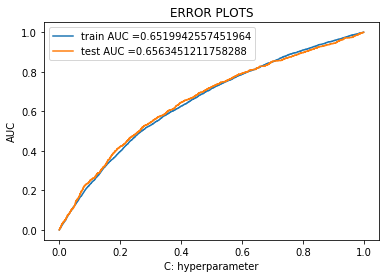

Train confusion matrix
[[40834 12551]
 [ 2657  2192]]
Test confusion matrix
[[10212  3098]
 [  667   582]]


In [550]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1',C=0.1,class_weight='balanced',solver='saga')
logreg.fit(X_train, y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, logreg.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, logreg.predict(X_test)))


In [563]:
logreg.coef_

array([[-7.50861036e-08, -7.22706018e-08,  4.06089605e-07,
         1.03698963e-04,  6.33620623e-06,  6.35626624e-05,
        -5.39554312e-05, -3.93020727e-06, -4.22937673e-06,
         6.09560554e-08,  5.90510489e-05,  5.51666798e-05,
         5.48555334e-05, -3.04866486e-05,  7.72642815e-06,
         4.33678141e-05, -2.48436314e-05,  5.91754391e-07,
         1.40643325e-05,  5.49515781e-05]])

In [551]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,logreg.predict(X_train))

0.738846721846344

In [552]:
accuracy_score(y_test,logreg.predict(X_test))

0.7413970739748609

In [555]:
y_valid_pred=logreg.predict_proba(X_test)[:,1]

In [561]:
output=pd.DataFrame([y_valid_pred,y_test],index=['Predicted','Actual']).T

In [562]:
output.to_csv('output_valid.csv')